In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from esem import rf_model

from utils import *

In [2]:
train_files = [ "historical", "ssp585", "ssp126", "ssp370", ]
# Create training and testing arrays
X, solvers = create_predictor_data(train_files)
Y = create_predictdand_data(train_files)

In [4]:
rf_tas = rf_model(X, Y['tas'])
rf_tas.train()


In [5]:
## Test on SSP245

X_test = get_test_data('ssp245', solvers)
Y_test = create_predictdand_data(['ssp245'])

tas_truth = Y_test["tas"]


In [14]:
m_out_tas, _ = rf_tas.predict(X_test)
m_out_tas = m_out_tas.rename(sample='time')


In [15]:
print(f"RMSE: {get_rmse(tas_truth[65:], m_out_tas[65:].data).mean()}")
print("\n")

RMSE: 0.40504923986243135




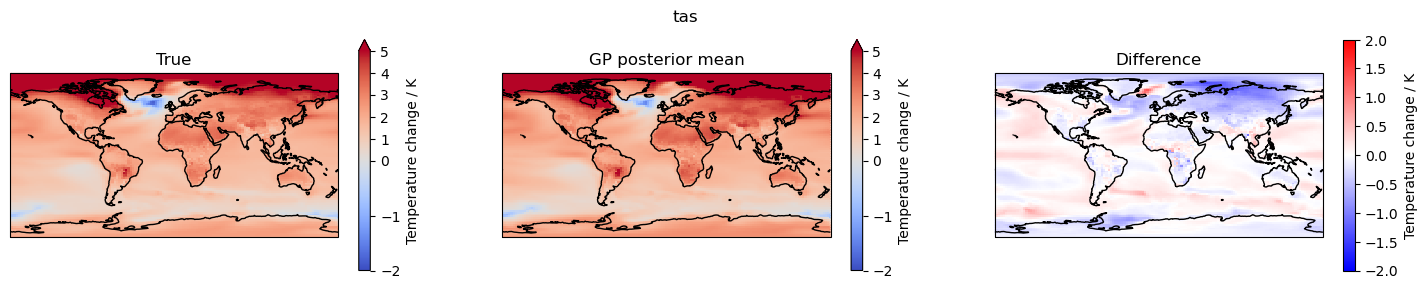

In [17]:
plot_diff(tas_truth, m_out_tas, "tas")

In [ ]:
# TODO: Tune the hyperparameters...
rf_tas = rf_model(X, Y['tas'], random_state=0, bootstrap=True, max_features='auto', **{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 7,  'max_depth': 5,})